## Sandia Analysis - Peak SWE Comparison
See if snow totals given to me by the ski area correlate to peak SWE

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd

### Load datasets

In [2]:
#Load snow timeseries
data = pd.read_pickle('../data/NMData/sandia_snow.pkl')

In [3]:
data['swe_in'] = data.swe_mm / 25.4
data.head()

,swe_mm,depth_mm,depth_in,swe_in
time,,,,
1981-10-01,0.0,0.0,0.0,0.0
1981-10-02,0.0,0.0,0.0,0.0
1981-10-03,0.0,0.0,0.0,0.0
1981-10-04,0.0,0.0,0.0,0.0
1981-10-05,0.0,0.0,0.0,0.0


In [4]:
totals = pd.read_csv('../data/NMData/SandiaData.csv',index_col='Water_Year')
totals.head()

,Area_Days_Open,Total_Snowfall
Water_Year,,
1981,17.0,90.0
1982,47.0,91.0
1983,141.0,233.0
1984,93.0,139.0
1985,131.0,250.0


### Initial Plot

<AxesSubplot: xlabel='Water_Year'>

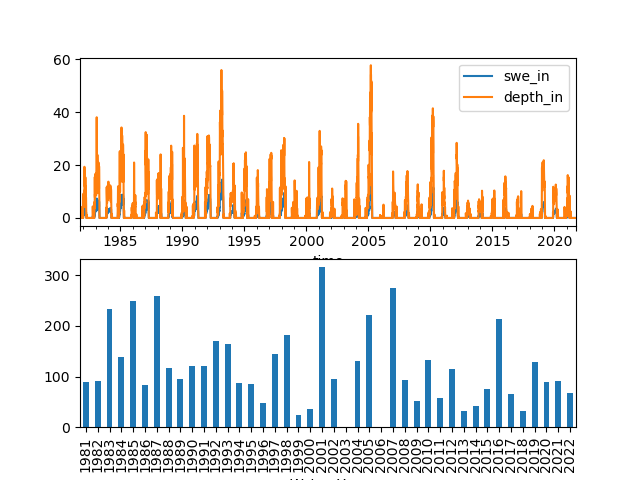

In [5]:
fig1, ax1 = plt.subplots(2,1)
data[['swe_in','depth_in']].plot(ax=ax1[0])
totals['Total_Snowfall'].plot.bar(ax=ax1[1])

## Peak SWE/Depth by water year

In [6]:
data['hydro_year'] = data.index.year
data['hydro_year'].loc[data.index.month >= 9] += 1
data.head()

C:\Users\clmbn\AppData\Local\Temp\ipykernel_17012\680670986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hydro_year'].loc[data.index.month >= 9] += 1


,swe_mm,depth_mm,depth_in,swe_in,hydro_year
time,,,,,
1981-10-01,0.0,0.0,0.0,0.0,1982
1981-10-02,0.0,0.0,0.0,0.0,1982
1981-10-03,0.0,0.0,0.0,0.0,1982
1981-10-04,0.0,0.0,0.0,0.0,1982
1981-10-05,0.0,0.0,0.0,0.0,1982


In [7]:
#Trying anchored offsets
dataWY_max = data.resample('AS-SEP').agg({'hydro_year':'first','swe_in':'max','depth_in':'max'})
dataWY_max.head()

,hydro_year,swe_in,depth_in
time,,,
1981-09-01,1982,4.448819,19.370079
1982-09-01,1983,7.362205,38.110237
1983-09-01,1984,3.740158,13.740158
1984-09-01,1985,8.818898,34.251968
1985-09-01,1986,2.598425,20.984253


In [8]:
dataWY_max = dataWY_max.set_index('hydro_year')
dataWY_max.head()

,swe_in,depth_in
hydro_year,,
1982,4.448819,19.370079
1983,7.362205,38.110237
1984,3.740158,13.740158
1985,8.818898,34.251968
1986,2.598425,20.984253


### Combine datasets

In [9]:
data_combined = pd.merge(dataWY_max,totals[['Total_Snowfall']],left_index=True,right_index=True,how='outer')
data_combined.head()

,swe_in,depth_in,Total_Snowfall
1981,NaN,NaN,90.0
1982,4.448819,19.370079,91.0
1983,7.362205,38.110237,233.0
1984,3.740158,13.740158,139.0
1985,8.818898,34.251968,250.0


<AxesSubplot: xlabel='Total_Snowfall', ylabel='swe_in'>

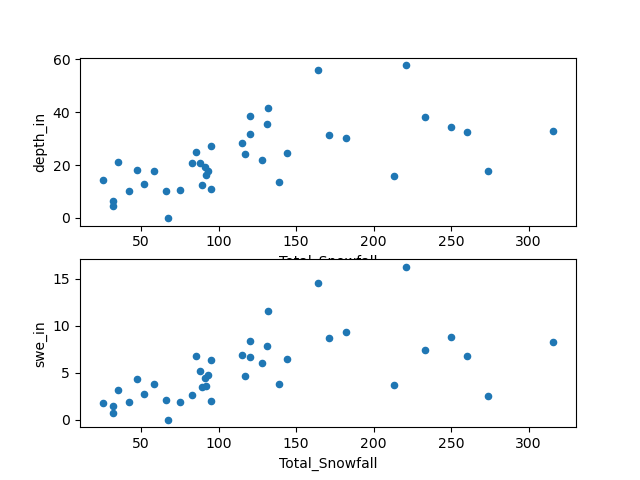

In [10]:
fig2, ax2 = plt.subplots(2,1)
data_combined.plot.scatter(x='Total_Snowfall',y='depth_in',ax=ax2[0])
data_combined.plot.scatter(x='Total_Snowfall',y='swe_in',ax=ax2[1])

In [ ]:
fig3, ax3 = plt.subplots(1,1)
data_combined.plot.bar(ax=ax3)